In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import re

sys.path.append("../../src/md_sim")
from load_lammps_log import load_thermo, energy_drift, load_all_runs
from structure_analysis import load_hdf

In [2]:
run_data                       = load_all_runs("/mnt/TOSHIBA_EXT/Nextcloud/Work/W_PhD/W_PhD_Analysis/Simulations/LAMMPS/free_expansion_airebo_m/")
#h5_file                         = "/mnt/TOSHIBA_EXT/Nextcloud/Work/W_PhD/W_PhD_Analysis/Simulations/LAMMPS/free_expansion_airebo_m/airebo_m.h5"
#metadata_df, run_dic            = load_hdf(h5_file)

In [7]:
run_data.loc[0]['cells']

16

In [9]:
sub_df          = run_data.loc[run_data["cells"] == 8]
#sub_df.loc[sub_df["temperature"] < 5000]
run_data

,lattice_constant,temperature,cells,timestep_eq,timestep_ex,drift,n_atoms,dE,dumpfile,run_steps_eq,run_steps_ex
0,3.35,4000,16,1.000000e-16,1.000000e-16,4.778045e+08,32768,-280.950,/mnt/TOSHIBA_EXT/Nextcloud/Work/W_PhD/W_PhD_An...,20000,100000
1,3.35,1000,8,1.000000e-16,1.000000e-16,-8.037451e+08,4096,39.173,/mnt/TOSHIBA_EXT/Nextcloud/Work/W_PhD/W_PhD_An...,20000,200000
2,3.35,2000,8,1.000000e-16,1.000000e-16,-2.566599e+09,4096,103.940,/mnt/TOSHIBA_EXT/Nextcloud/Work/W_PhD/W_PhD_An...,20000,200000
3,3.35,3000,8,1.000000e-16,1.000000e-16,-5.305114e+09,4096,189.290,/mnt/TOSHIBA_EXT/Nextcloud/Work/W_PhD/W_PhD_An...,20000,200000
4,3.35,4000,8,1.000000e-16,1.000000e-16,-9.692637e+09,4096,280.223,/mnt/TOSHIBA_EXT/Nextcloud/Work/W_PhD/W_PhD_An...,20000,200000
5,3.35,5000,8,1.000000e-16,1.000000e-16,-8.135242e+09,4096,86.089,/mnt/TOSHIBA_EXT/Nextcloud/Work/W_PhD/W_PhD_An...,20000,150000
6,3.40,3000,8,1.000000e-16,1.000000e-16,-7.179568e+09,4096,184.999,/mnt/TOSHIBA_EXT/Nextcloud/Work/W_PhD/W_PhD_An...,20000,200000
7,3.40,2000,8,1.000000e-16,1.000000e-16,-3.063962e+09,4096,105.802,/mnt/TOSHIBA_EXT/Nextcloud/Work/W_PhD/W_PhD_An...,20000,200000
8,3.40,1000,8,1.000000e-16,1.000000e-16,3.158805e+09,4096,19.961,/mnt/TOSHIBA_EXT/Nextcloud/Work/W_PhD/W_PhD_An...,20000,200000
9,3.40,4000,8,1.000000e-16,1.000000e-16,-4.482299e+09,4096,71.992,/mnt/TOSHIBA_EXT/Nextcloud/Work/W_PhD/W_PhD_An...,20000,200000


In [51]:
run_dic['3_35_4000K_8x8x8']['diamond_lattice'][150,1:4]

array([4095,    1,    0])

In [36]:
sub_df                  = metadata_df.loc[metadata_df['cells'] == 8]
temps                   = [1000,2000,3000,4000]
sub_df                  = sub_df[sub_df["temperature"] < 5000]
run_keys                = [(re.sub('\.','_',str(a)) + "_" + re.split("/", b)[-1]) for a,b in zip(sub_df['lattice_constant'].values,sub_df['dumpfile'].values)]
len(run_keys)


16

In [59]:
### convert to eV/ps/atom
drift                       = np.abs(run_data["drift"].values) * 1e-12
np.max(drift) * 1e3
print(run_data['dumpfile'][1])


/mnt/TOSHIBA_EXT/Nextcloud/Work/W_PhD/W_PhD_Analysis/Simulations/LAMMPS/free_expansion_airebo_m/grid_3_35/1000K_8x8x8


In [4]:
store_as_hdf(run_data['dumpfile'][1],bins=100)

  0%|          | 0/1761 [00:00<?, ?it/s]/home/benjamin/Nextcloud/Work/W_PhD/W_PhD_Git/PhD_Git/PhD_Thesis/notebooks/md_sim/../../src/md_sim/structure_analysis.py:42: RuntimeWarning: invalid value encountered in true_divide
  lattice_onions[shell_id]            = lattice_onions[shell_id][:]/np.sum(lattice_onions[shell_id][:])
100%|██████████| 1761/1761 [02:02<00:00, 14.40it/s]


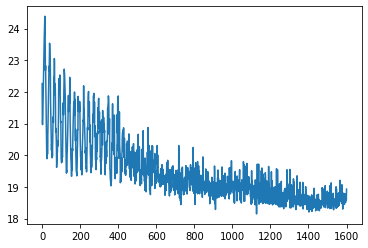

In [53]:
plt.plot(diamond_radius[160:])


In [4]:
structure_type, diamond_lattice, rdf_total, \
    diamond_center, diamond_radius, \
        diamond_onion, diamond_onion_outer_r         = diamond_structure(run_data['dumpfile'][1])

  0%|          | 0/1761 [00:00<?, ?it/s]/home/benjamin/Nextcloud/Work/W_PhD/W_PhD_Git/PhD_Git/PhD_Thesis/notebooks/md_sim/../../src/md_sim/structure_analysis.py:41: RuntimeWarning: invalid value encountered in true_divide
  lattice_onions[shell_id]            = lattice_onions[shell_id][:]/np.sum(lattice_onions[shell_id][:])
100%|██████████| 1761/1761 [02:45<00:00, 10.65it/s]


In [13]:
bins                = 200. 
r_max               = 20.
r_inner             = np.arange(bins) * r_max/bins
r_outer             = np.arange(bins) * r_max/bins + r_max/bins
r_outer.shape

(200,)

In [ ]:
lattice_onions_all

plt.plot(lattice_onions_all[1,:,3])

In [ ]:
plt.plot(lattice_onions_all[210,:,1])

In [ ]:
dfs, timesteps, n_atoms      = load_thermo("/mnt/TOSHIBA_EXT/Nextcloud/Work/W_PhD/W_PhD_Analysis/Simulations/LAMMPS/free_expansion_airebo_m/grid_3_40/1000K_8x8x8.log")
#drift                        = energy_drift(dfs[0], timesteps[0], n_atoms)

In [ ]:
### convert to eV/ps/atom
print((np.max(drift) * 1e3))

### convert to eV/atom over total time
print(np.max(drift) * 1e3 * 2.)

In [ ]:
np.max(np.abs(dfs[0]["E_pair"].values[200:]))-np.min(np.abs(dfs[0]["E_pair"].values[200:]))

In [ ]:
drift

In [ ]:
0.0001